In [6]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from plotting import*


In [7]:
reset_plt(24,24)

In [40]:
df = pd.read_csv("synop_hourly_clean.csv")

In [4]:
df

,to,stationId,max_temp_w_date,max_wind_speed_10min,max_wind_speed_3sec,mean_pressure,mean_relative_hum,mean_temp,mean_wind_dir,mean_wind_speed,min_temp,vapour_pressure_deficit_mean
0,2011-01-01T00:00:00+00:00,6019,4.5,14.4,20.3,NaN,76.2,4.1,290.0,14.1,3.8,0.2
1,2011-01-01T00:00:00+00:00,6031,4.2,14.0,20.9,NaN,74.5,3.8,281.0,12.7,3.4,0.2
2,2011-01-01T00:00:00+00:00,6032,4.0,14.1,19.2,997.3,75.5,3.7,282.0,13.0,3.2,0.2
3,2011-01-01T00:00:00+00:00,6041,4.8,12.7,17.7,995.3,68.5,4.6,287.0,12.1,4.4,0.3
4,2011-01-01T00:00:00+00:00,6049,4.0,18.7,27.4,1001.3,89.2,3.6,287.0,15.1,3.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
5447324,2022-05-12T17:00:00+00:00,6187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5447325,2022-05-12T17:00:00+00:00,6188,14.5,9.2,14.1,1012.2,56.5,13.8,263.0,7.9,13.4,0.7
5447326,2022-05-12T17:00:00+00:00,6190,12.4,7.2,9.3,1013.7,80.8,12.1,252.0,6.4,11.7,0.3
5447327,2022-05-12T17:00:00+00:00,6193,12.3,10.2,11.9,1013.0,79.2,11.6,237.0,9.0,11.1,0.3


In [9]:
df.isna().sum()

to                                   0
stationId                            0
max_temp_w_date                 179274
max_wind_speed_10min            497921
max_wind_speed_3sec             501133
mean_pressure                   875249
mean_relative_hum               101161
mean_temp                       179348
mean_wind_dir                   498185
mean_wind_speed                 497921
min_temp                        179350
vapour_pressure_deficit_mean    179860
dtype: int64

In [29]:
station_coords = pd.read_csv("stationId_coord.csv")

In [31]:
station_coords.sort_values(by="stationId")

,stationId,latitude,longitude
58035,6019,56.9300,8.6412
298713,6019,56.9300,8.6412
376426,6019,56.9300,8.6412
39555,6019,56.9300,8.6412
190805,6019,56.9300,8.6412
...,...,...,...
69474,6197,55.0557,15.0953
270992,6197,55.0557,15.0953
271047,6197,55.0557,15.0953
69419,6197,55.0557,15.0953


In [33]:
station_coords["stationId"].unique()

array([6031, 6065, 6068, 6102, 6104, 6108, 6116, 6118, 6119, 6123, 6019,
       6032, 6041, 6049, 6051, 6052, 6056, 6058, 6070, 6072, 6073, 6074,
       6079, 6080, 6081, 6082, 6088, 6093, 6096, 6120, 6124, 6126, 6132,
       6135, 6136, 6138, 6141, 6147, 6149, 6151, 6154, 6156, 6159, 6168,
       6169, 6170, 6174, 6180, 6181, 6186, 6187, 6188, 6190, 6193, 6197])

In [34]:
station_coords["latitude"].unique()

array([57.1852, 56.7558, 56.0939, 55.868 , 55.7379, 55.4376, 54.8986,
       54.9616, 54.8528, 55.2444, 56.93  , 57.3828, 57.7364, 56.5604,
       56.7637, 56.7068, 56.383 , 56.0072, 56.3083, 56.3027, 56.0955,
       56.0803, 56.7169, 55.5281, 55.5575, 55.9591, 55.4484, 55.2908,
       55.1904, 55.4748, 55.0144, 55.3088, 55.8315, 55.3224, 55.2465,
       54.8205, 54.8275, 54.879 , 54.5687, 55.1593, 55.2075, 55.7358,
       55.7435, 56.1193, 56.0083, 55.5867, 55.3955, 55.614 , 55.7664,
       55.6861, 55.6886, 55.8764, 55.0677, 55.2979, 55.0557])

In [35]:
stationID = station_coords["stationId"].unique()
station_latitude = station_coords["latitude"].unique()
station_longitude = station_coords["longitude"].unique()

In [41]:
df["latitude"] = df["stationId"]
df["longitude"] = df["stationId"]

In [42]:
for i in range(len(stationID)):
    df.loc[df["latitude"] == stationID[i],"latitude"] = station_latitude[i]
    df.loc[df["longitude"] == stationID[i],"longitude"] = station_longitude[i]

In [18]:
df.dropna(thresh=3,inplace=True)

In [43]:
df

,to,stationId,max_temp_w_date,max_wind_speed_10min,max_wind_speed_3sec,mean_pressure,mean_relative_hum,mean_temp,mean_wind_dir,mean_wind_speed,min_temp,vapour_pressure_deficit_mean,latitude,longitude
0,2011-01-01T00:00:00+00:00,6019,4.5,14.4,20.3,NaN,76.2,4.1,290.0,14.1,3.8,0.2,56.9300,8.6412
1,2011-01-01T00:00:00+00:00,6031,4.2,14.0,20.9,NaN,74.5,3.8,281.0,12.7,3.4,0.2,57.1852,9.9527
2,2011-01-01T00:00:00+00:00,6032,4.0,14.1,19.2,997.3,75.5,3.7,282.0,13.0,3.2,0.2,57.3828,10.3349
3,2011-01-01T00:00:00+00:00,6041,4.8,12.7,17.7,995.3,68.5,4.6,287.0,12.1,4.4,0.3,57.7364,10.6316
4,2011-01-01T00:00:00+00:00,6049,4.0,18.7,27.4,1001.3,89.2,3.6,287.0,15.1,3.0,0.1,56.5604,10.0929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447324,2022-05-12T17:00:00+00:00,6187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.6886,12.5985
5447325,2022-05-12T17:00:00+00:00,6188,14.5,9.2,14.1,1012.2,56.5,13.8,263.0,7.9,13.4,0.7,55.8764,12.4121
5447326,2022-05-12T17:00:00+00:00,6190,12.4,7.2,9.3,1013.7,80.8,12.1,252.0,6.4,11.7,0.3,55.0677,14.7494
5447327,2022-05-12T17:00:00+00:00,6193,12.3,10.2,11.9,1013.0,79.2,11.6,237.0,9.0,11.1,0.3,55.2979,14.7718


In [44]:
cols = df.columns.tolist()
print(cols)

['to', 'stationId', 'max_temp_w_date', 'max_wind_speed_10min', 'max_wind_speed_3sec', 'mean_pressure', 'mean_relative_hum', 'mean_temp', 'mean_wind_dir', 'mean_wind_speed', 'min_temp', 'vapour_pressure_deficit_mean', 'latitude', 'longitude']


In [45]:
new_cols = ['to', 'stationId', 'latitude', 'longitude', 'max_temp_w_date', 'max_wind_speed_10min', 'max_wind_speed_3sec', 'mean_pressure', 'mean_relative_hum', 'mean_temp', 'mean_wind_dir', 'mean_wind_speed', 'min_temp', 'vapour_pressure_deficit_mean']

In [46]:
df = df[new_cols]

In [47]:
df

,to,stationId,latitude,longitude,max_temp_w_date,max_wind_speed_10min,max_wind_speed_3sec,mean_pressure,mean_relative_hum,mean_temp,mean_wind_dir,mean_wind_speed,min_temp,vapour_pressure_deficit_mean
0,2011-01-01T00:00:00+00:00,6019,56.9300,8.6412,4.5,14.4,20.3,NaN,76.2,4.1,290.0,14.1,3.8,0.2
1,2011-01-01T00:00:00+00:00,6031,57.1852,9.9527,4.2,14.0,20.9,NaN,74.5,3.8,281.0,12.7,3.4,0.2
2,2011-01-01T00:00:00+00:00,6032,57.3828,10.3349,4.0,14.1,19.2,997.3,75.5,3.7,282.0,13.0,3.2,0.2
3,2011-01-01T00:00:00+00:00,6041,57.7364,10.6316,4.8,12.7,17.7,995.3,68.5,4.6,287.0,12.1,4.4,0.3
4,2011-01-01T00:00:00+00:00,6049,56.5604,10.0929,4.0,18.7,27.4,1001.3,89.2,3.6,287.0,15.1,3.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447324,2022-05-12T17:00:00+00:00,6187,55.6886,12.5985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5447325,2022-05-12T17:00:00+00:00,6188,55.8764,12.4121,14.5,9.2,14.1,1012.2,56.5,13.8,263.0,7.9,13.4,0.7
5447326,2022-05-12T17:00:00+00:00,6190,55.0677,14.7494,12.4,7.2,9.3,1013.7,80.8,12.1,252.0,6.4,11.7,0.3
5447327,2022-05-12T17:00:00+00:00,6193,55.2979,14.7718,12.3,10.2,11.9,1013.0,79.2,11.6,237.0,9.0,11.1,0.3


In [48]:
df.isna().sum()

to                                   0
stationId                            0
latitude                             0
longitude                            0
max_temp_w_date                 179274
max_wind_speed_10min            497921
max_wind_speed_3sec             501133
mean_pressure                   875249
mean_relative_hum               101161
mean_temp                       179348
mean_wind_dir                   498185
mean_wind_speed                 497921
min_temp                        179350
vapour_pressure_deficit_mean    179860
dtype: int64

In [49]:
df.to_csv("synop_hourly_w_coord.csv")

In [50]:
df_test = df.dropna(how="any")

In [51]:
df_test.isna().sum()

to                              0
stationId                       0
latitude                        0
longitude                       0
max_temp_w_date                 0
max_wind_speed_10min            0
max_wind_speed_3sec             0
mean_pressure                   0
mean_relative_hum               0
mean_temp                       0
mean_wind_dir                   0
mean_wind_speed                 0
min_temp                        0
vapour_pressure_deficit_mean    0
dtype: int64

In [52]:
df_test

,to,stationId,latitude,longitude,max_temp_w_date,max_wind_speed_10min,max_wind_speed_3sec,mean_pressure,mean_relative_hum,mean_temp,mean_wind_dir,mean_wind_speed,min_temp,vapour_pressure_deficit_mean
2,2011-01-01T00:00:00+00:00,6032,57.3828,10.3349,4.0,14.1,19.2,997.3,75.5,3.7,282.0,13.0,3.2,0.2
3,2011-01-01T00:00:00+00:00,6041,57.7364,10.6316,4.8,12.7,17.7,995.3,68.5,4.6,287.0,12.1,4.4,0.3
4,2011-01-01T00:00:00+00:00,6049,56.5604,10.0929,4.0,18.7,27.4,1001.3,89.2,3.6,287.0,15.1,3.0,0.1
6,2011-01-01T00:00:00+00:00,6052,56.7068,8.2150,4.7,15.1,20.7,1005.9,87.3,4.2,302.0,13.6,4.1,0.1
7,2011-01-01T00:00:00+00:00,6056,56.3830,8.6705,5.1,12.8,24.9,1005.6,93.8,4.8,284.0,11.8,4.7,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447322,2022-05-12T17:00:00+00:00,6181,55.7664,12.5263,14.9,6.3,12.3,1012.4,54.2,14.5,274.0,5.4,14.2,0.8
5447325,2022-05-12T17:00:00+00:00,6188,55.8764,12.4121,14.5,9.2,14.1,1012.2,56.5,13.8,263.0,7.9,13.4,0.7
5447326,2022-05-12T17:00:00+00:00,6190,55.0677,14.7494,12.4,7.2,9.3,1013.7,80.8,12.1,252.0,6.4,11.7,0.3
5447327,2022-05-12T17:00:00+00:00,6193,55.2979,14.7718,12.3,10.2,11.9,1013.0,79.2,11.6,237.0,9.0,11.1,0.3


In [53]:
df_test.to_csv("synop_all_nan_removed.csv")

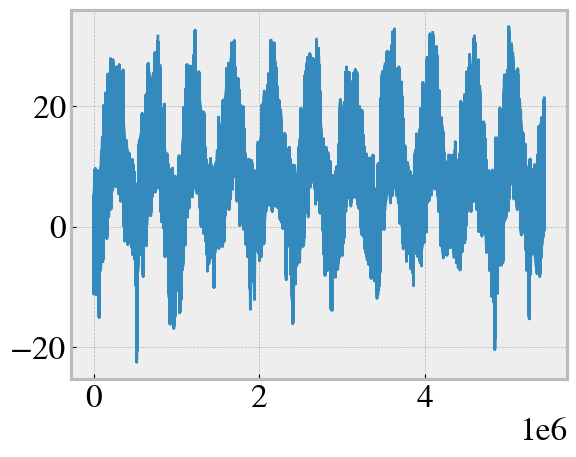

In [8]:
plt.plot(df["mean_temp"])